In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

First, let's load the datasets.

In [8]:
seen_tv_series_df = pd.read_csv("data/output/seen_tv_series.csv", index_col="tvdb_id")
my_ratings_df = pd.read_csv("data/input/my_ratings.csv", index_col="tvdb_id")
imdb_series_df = pd.read_csv("data/output/imdb_series.csv")

Now, let's augment the TV series dataset with my ratings.

In [9]:
for i, row in seen_tv_series_df.iterrows():
    seen_tv_series_df.loc[i, "my_rating"] = my_ratings_df.loc[i, "my_rating"]
seen_tv_series_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 70533 to 365480
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   series_name      139 non-null    object 
 1   num_seasons      139 non-null    int64  
 2   poster           139 non-null    object 
 3   banner           139 non-null    object 
 4   fanart           139 non-null    object 
 5   status           139 non-null    object 
 6   first_aired      139 non-null    object 
 7   network          139 non-null    object 
 8   runtime          139 non-null    int64  
 9   genre            139 non-null    object 
 10  overview         139 non-null    object 
 11  rating           139 non-null    object 
 12  imdb_id          139 non-null    object 
 13  tvdb_avg_rating  139 non-null    float64
 14  tvdb_ratings     139 non-null    int64  
 15  my_rating        134 non-null    float64
dtypes: float64(2), int64(3), object(11)
memory usage: 16.5+

In [5]:
seen_tv_series_df.describe()

,num_seasons,runtime,tvdb_avg_rating,tvdb_ratings,my_rating
count,139.000000,139.000000,139.000000,139.00000,134.000000
mean,4.093525,44.503597,8.233813,4803.52518,6.843284
std,3.113533,15.084003,2.119255,7974.58657,1.716153
min,1.000000,10.000000,0.000000,0.00000,2.000000
25%,2.000000,27.500000,8.400000,373.50000,6.000000
50%,3.000000,45.000000,8.800000,1916.00000,7.000000
75%,5.000000,55.000000,9.000000,5045.50000,8.000000
max,18.000000,90.000000,10.000000,43019.00000,10.000000


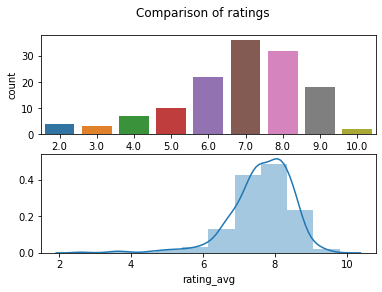

In [11]:
fig, axs = plt.subplots(2)
fig.suptitle("Comparison of ratings")
sns.countplot(seen_tv_series_df["my_rating"], ax=axs[0])
axs[0].set(xlabel="My ratings")
sns.distplot(imdb_series_df["rating_avg"], bins=10, ax=axs[1])

plt.show()